In [1]:
!pip install ucimlrepo
!pip install mlrose_ky

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 3.1 MB/s eta 0:00:00


In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import mlrose_ky as mlrose
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import time
import random
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

In [3]:
RANDOM_STATE = 42

In [4]:
# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

In [5]:
def label (row):
   if row['Rings']>=1 and row['Rings']<=8:
      return 1
   elif row['Rings'] >=9 and row['Rings']<=10:
      return 2
   elif row['Rings']>=11 and row['Rings']<=29:
      return 3
   return 0

In [6]:
#data preprocessing

# storing categorized y in temp
temp = y.apply(lambda row: label(row),axis=1)

# dropping Sex from the interested columns because of low correlation
interested_columns = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

# test and train data split
X_train, X_test, y_train, y_test= train_test_split(X[interested_columns], temp, test_size=0.2, random_state=RANDOM_STATE)


In [7]:
def nn_scale_split(train_x , test_x, train_y , test_y):
  # scale train and test
  scaler = StandardScaler()
  train_x = scaler.fit_transform(train_x)
  test_x = scaler.transform(test_x)

  return train_x , test_x , train_y , test_y

In [8]:
train_x , test_x , train_y , test_y = nn_scale_split(X_train, X_test, y_train, y_test)

In [9]:
nn = MLPClassifier(activation='relu',alpha = 0.005651157902710025, hidden_layer_sizes= (150,), solver='adam',random_state = RANDOM_STATE )
start = time.time()
nn.fit(train_x, y_train)
end = time.time()
print(end-start)
y_pred = nn.predict(test_x)
loss_curve_train = nn.loss_curve_ # Get the training loss curve
print(metrics.f1_score(y_test, y_pred, average='macro'))


16.984111547470093
0.6602883194353799


In [13]:
# import mlrose
import numpy as np
from sklearn.metrics import log_loss
import time
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score

In [ ]:
def nn_learning_curve(train_x , train_y , scorer):
  nn = MLPClassifier(max_iter=1 , random_state = RANDOM_STATE , warm_start = True , activation='relu',alpha = 0.005651157902710025, hidden_layer_sizes= (150,), solver='adam')
  loss_curves = []
  train_y = np.array(train_y)
  for train_index, test_index in kf.split(train_x):
    temp_train_x, temp_val_x = train_x[train_index ,:], train_x[test_index,:]
    temp_train_y, temp_val_y = train_y[train_index], train_y[test_index]

    # Fit the model on the training fold
    nn.fit(temp_train_x, temp_train_y)

    # Append the loss curve for this fold
    loss_curves.append(nn.loss_curve_)

  loss_curves = np.array([np.pad(curve, (0, 1000 - len(curve)), 'constant', constant_values=np.nan) for curve in loss_curves])
  mean_loss_curve = np.nanmean(loss_curves, axis=0)
  std_loss_curve = np.nanstd(loss_curves, axis=0)

  # Plot the averaged loss curve
  plt.figure()
  plt.plot(mean_loss_curve, label="Average Training Loss")
  plt.fill_between(range(len(mean_loss_curve)),
                  mean_loss_curve - std_loss_curve,
                  mean_loss_curve + std_loss_curve,
                  color="blue", alpha=0.2, label="Loss Std Dev")
  plt.title("Loss Curve (Average Training Loss vs Epochs) with Cross-Validation")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)
  plt.legend(loc="best")
  plt.show()

In [ ]:
nn_learning_curve(train_x , train_y , f1_score)

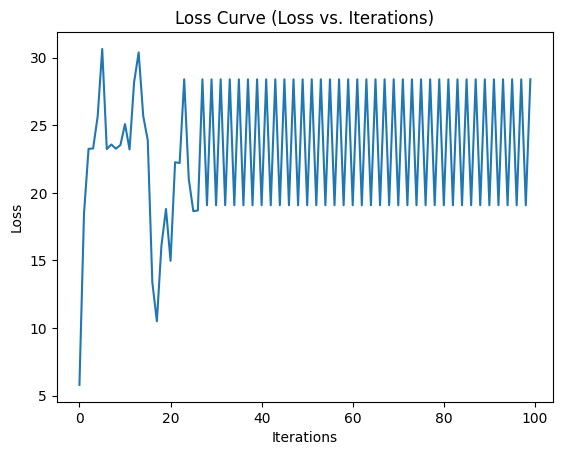

0.13297777804615796


In [30]:
train_y_encoded = one_hot.fit_transform(train_y.values.reshape(-1, 1)).toarray()
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y_encoded, test_size=0.2, random_state=42)

nn_model = mlrose.NeuralNetwork(
                hidden_nodes=[150],  # You can adjust hidden nodes if needed
                activation='relu', algorithm='gradient_descent',
                learning_rate=0.005651157902710025,
                curve=True, random_state=42
            )
nn_model.fit(X_train, y_train)
y_pred = nn_model.predict(X_val)
y_pred_labels = one_hot.inverse_transform(y_pred)
y_val_labels = one_hot.inverse_transform(y_val)

# Calculate accuracy
accuracy = accuracy_score(y_val_labels, y_pred_labels)

# print(nn_model.fitness_curve)
plt.plot(nn_model.fitness_curve[:])
plt.title("Loss Curve (Loss vs. Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()
y_pred = nn_model.predict(test_x)
y_pred  = [np.argmax(x)+1 for x in y_pred]
print(f1_score(y_test, y_pred , average = 'macro'))

plot loss curve
As with A1, it helps to be inquisitive about your results... focusing on why certain algorithms struggle with certain types of problems and why others do well on said problems.

Finally, you should talk at length on what worked and what didn't. How did you improve performance by tuning hyperparameters? Why did one configuration work while the other did not? Is there anything you can do to improve performance even further?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Example dataset (replace this with your actual data)
# Assuming train_x and train_y are already defined.
train_y_encoded = one_hot.fit_transform(train_y.values.reshape(-1, 1)).toarray()

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y_encoded, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rates to try
    'max_iters': [200, 500, 1000],        # Max iterations to try
    'restarts': [0, 5, 10]                # Restart values to try
}

# Track the best parameters and accuracy
best_params = None
best_accuracy = 0
best_model = None

# Perform Grid Search
for learning_rate in param_grid['learning_rate']:
    for max_iters in param_grid['max_iters']:
        for restarts in param_grid['restarts']:
            # Initialize Neural Network model with current hyperparameters
            nn_model = mlrose.NeuralNetwork(
                hidden_nodes=[150],  # You can adjust hidden nodes if needed
                activation='relu', algorithm='random_hill_climb',
                max_iters=max_iters, learning_rate=learning_rate, restarts=restarts,
                curve=True, random_state=42
            )

            # Train the model
            nn_model.fit(X_train, y_train)

            # Get predictions on the validation set
            y_pred = nn_model.predict(X_val)
            y_pred_labels = one_hot.inverse_transform(y_pred)
            y_val_labels = one_hot.inverse_transform(y_val)

            # Calculate accuracy
            accuracy = accuracy_score(y_val_labels, y_pred_labels)

            # Check if this is the best model so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'learning_rate': learning_rate,
                    'max_iters': max_iters,
                    'restarts': restarts
                }
                best_model = nn_model  # Save the best model

            # Print current hyperparameter combination and its accuracy
            print(f"Params: LR={learning_rate}, Max Iters={max_iters}, Restarts={restarts} - Accuracy: {accuracy}")

# Print the best parameters and accuracy after grid search
print(f"Best Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy}")
# Best Parameters: {'learning_rate': 0.1, 'max_iters': 1000, 'restarts': 5}
# Best Validation Accuracy: 0.5829596412556054


Params: LR=0.001, Max Iters=200, Restarts=0 - Accuracy: 0.14947683109118087
Params: LR=0.001, Max Iters=200, Restarts=5 - Accuracy: 0.43946188340807174
Params: LR=0.001, Max Iters=200, Restarts=10 - Accuracy: 0.43946188340807174
Params: LR=0.001, Max Iters=500, Restarts=0 - Accuracy: 0.15097159940209268
Params: LR=0.001, Max Iters=500, Restarts=5 - Accuracy: 0.5396113602391629
Params: LR=0.001, Max Iters=500, Restarts=10 - Accuracy: 0.5396113602391629
Params: LR=0.001, Max Iters=1000, Restarts=0 - Accuracy: 0.15396113602391628
Params: LR=0.001, Max Iters=1000, Restarts=5 - Accuracy: 0.32884902840059793
Params: LR=0.001, Max Iters=1000, Restarts=10 - Accuracy: 0.5186846038863976
Params: LR=0.01, Max Iters=200, Restarts=0 - Accuracy: 0.1554559043348281
Params: LR=0.01, Max Iters=200, Restarts=5 - Accuracy: 0.4484304932735426
Params: LR=0.01, Max Iters=200, Restarts=10 - Accuracy: 0.4484304932735426
Params: LR=0.01, Max Iters=500, Restarts=0 - Accuracy: 0.16741405082212257
Params: LR=0.01

Validation Accuracy: 0.6382660687593423


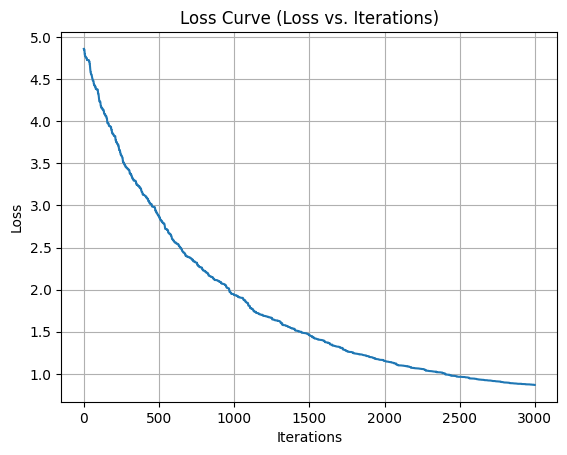

0.6188359359860492


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Example dataset (replace this with your actual data)
# Assuming train_x and train_y are defined
train_y_encoded = one_hot.fit_transform(train_y.values.reshape(-1, 1)).toarray()

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y_encoded, test_size=0.2, random_state=42)

# Use the best parameters found earlier


# Initialize the Neural Network model with RHC and best hyperparameters
nn_model = mlrose.NeuralNetwork(
    hidden_nodes=[150], activation='relu', algorithm='random_hill_climb',
    max_iters=3000, learning_rate=0.1, restarts=5,
    curve=True, random_state=42
)
#changed max_iter from 1000 to 3000.



# Train the model
nn_model.fit(X_train, y_train)

# Get predictions and calculate accuracy on the validation set
y_pred = nn_model.predict(X_val)

# Convert one-hot encoded predictions back to original labels
y_pred_labels = one_hot.inverse_transform(y_pred)
y_val_labels = one_hot.inverse_transform(y_val)

# Calculate accuracy
accuracy = accuracy_score(y_val_labels, y_pred_labels)
print(f"Validation Accuracy: {accuracy}")

# Step 4: Plot the loss curve
# The `fitness_curve` contains the loss values (not just fitness) at each iteration
plt.plot(nn_model.fitness_curve[:,0])
plt.title("Loss Curve (Loss vs. Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#0.58
#max_iter = 3k -> 0.63
#max_iter = 5k -> 0.6352
# Validation Accuracy: 0.6278026905829597
# Validation Accuracy: 0.6203288490284006
y_pred = nn_model.predict(test_x)
y_pred  = [np.argmax(x)+1 for x in y_pred]
print(f1_score(y_test, y_pred, average='macro'))

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Example dataset (replace this with your actual data)
# Assuming train_x and train_y are already defined.
train_y_encoded = one_hot.fit_transform(train_y.values.reshape(-1, 1)).toarray()

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y_encoded, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rates to try
    'max_iters': [200, 500, 1000],        # Max iterations to try
    'schedule': [mlrose.ExpDecay() ,mlrose.GeomDecay() ,mlrose.ArithDecay() ]                # Restart values to try
}

# Track the best parameters and accuracy
best_params = None
best_accuracy = 0
best_model = None

# Perform Grid Search
for learning_rate in param_grid['learning_rate']:
    for max_iters in param_grid['max_iters']:
        for schedule in param_grid['schedule']:
            # Initialize Neural Network model with current hyperparameters
            nn_model = mlrose.NeuralNetwork(hidden_nodes=[150],  # You can adjust hidden nodes if needed
                activation='relu', algorithm='simulated_annealing',
                max_iters=max_iters, learning_rate=learning_rate, schedule=schedule
                curve=True, random_state=42
            )

            # Train the model
            nn_model.fit(X_train, y_train)

            # Get predictions on the validation set
            y_pred = nn_model.predict(X_val)
            y_pred_labels = one_hot.inverse_transform(y_pred)
            y_val_labels = one_hot.inverse_transform(y_val)

            # Calculate accuracy
            accuracy = accuracy_score(y_val_labels, y_pred_labels)

            # Check if this is the best model so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'learning_rate': learning_rate,
                    'max_iters': max_iters,
                    'schedule': schedule,
                }
                best_model = nn_model  # Save the best model

            # Print current hyperparameter combination and its accuracy
            print(f"Params: LR={learning_rate}, Max Iters={max_iters}, schedule={schedule} - Accuracy: {accuracy}")

# Print the best parameters and accuracy after grid search
print(f"Best Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy}")

# Best Parameters: {'learning_rate': 0.1, 'max_iters': 1000, 'schedule': GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)}
# Best Validation Accuracy: 0.4857997010463378


Params: LR=0.001, Max Iters=200, schedule=ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001) - Accuracy: 0.14947683109118087
Params: LR=0.001, Max Iters=200, schedule=1.0 - Accuracy: 0.14947683109118087
Params: LR=0.001, Max Iters=200, schedule=ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001) - Accuracy: 0.14947683109118087
Params: LR=0.001, Max Iters=500, schedule=ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001) - Accuracy: 0.14947683109118087
Params: LR=0.001, Max Iters=500, schedule=1.0 - Accuracy: 0.14947683109118087
Params: LR=0.001, Max Iters=500, schedule=ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001) - Accuracy: 0.14947683109118087
Params: LR=0.001, Max Iters=1000, schedule=ExpDecay(init_temp=1.0, exp_const=0.005, min_temp=0.001) - Accuracy: 0.14947683109118087
Params: LR=0.001, Max Iters=1000, schedule=1.0 - Accuracy: 0.14947683109118087
Params: LR=0.001, Max Iters=1000, schedule=ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001) - Accuracy: 

Validation Accuracy: 0.5979073243647235


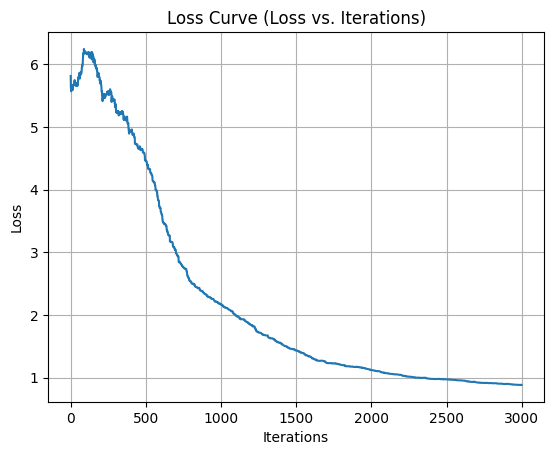

0.5877508629567955


In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Example dataset (replace this with your actual data)
# Assuming train_x and train_y are defined
train_y_encoded = one_hot.fit_transform(train_y.values.reshape(-1, 1)).toarray()

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y_encoded, test_size=0.2, random_state=42)

# Use the best parameters found earlier


# Initialize the Neural Network model with RHC and best hyperparameters
nn_model = mlrose.NeuralNetwork(
    hidden_nodes=[150], activation='relu', algorithm='simulated_annealing',
    max_iters=3000, learning_rate=0.1, schedule=mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001),
    curve=True, random_state=42
)
#changed max_iter from 1000 to 3000.



# Train the model
nn_model.fit(X_train, y_train)

# Get predictions and calculate accuracy on the validation set
y_pred = nn_model.predict(X_val)

# Convert one-hot encoded predictions back to original labels
y_pred_labels = one_hot.inverse_transform(y_pred)
y_val_labels = one_hot.inverse_transform(y_val)

# Calculate accuracy
accuracy = accuracy_score(y_val_labels, y_pred_labels)
print(f"Validation Accuracy: {accuracy}")

# Step 4: Plot the loss curve
# The `fitness_curve` contains the loss values (not just fitness) at each iteration
plt.plot(nn_model.fitness_curve[:,0])
plt.title("Loss Curve (Loss vs. Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#0.58
#max_iter = 3k -> 0.63
#max_iter = 5k -> 0.6352
# Validation Accuracy: 0.6278026905829597
# Validation Accuracy: 0.6203288490284006
# 0.5979073243647235
y_pred = nn_model.predict(test_x)
y_pred  = [np.argmax(x)+1 for x in y_pred]
print(f1_score(y_test, y_pred, average='macro'))
#0.5877508629567955

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Example dataset (replace this with your actual data)
# Assuming train_x and train_y are already defined.
train_y_encoded = one_hot.fit_transform(train_y.values.reshape(-1, 1)).toarray()

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y_encoded, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'pop_size': [20, 50, 70 , 100 , 200],  # Learning rates to try
    'mutation_rate': [0.1, 0.2, 0.5, 0.7, 1],        # Max iterations to try
    'max_iters': [100,500, 1000, 2000]                # Restart values to try
}

# Track the best parameters and accuracy
best_params = None
best_accuracy = 0
best_model = None

# Perform Grid Search
for ps in param_grid['pop_size']:
    for max_iters in param_grid['max_iters']:
        for mr in param_grid['mutation_rate']:
            # Initialize Neural Network model with current hyperparameters
            nn_model = mlrose.NeuralNetwork(hidden_nodes=[150],
                activation='relu', algorithm='genetic_alg',pop_size=ps,
                max_iters=max_iters, learning_rate  = mr,
                curve=True, random_state=42
            )

            # Train the model
            nn_model.fit(X_train, y_train)

            # Get predictions on the validation set
            y_pred = nn_model.predict(X_val)
            y_pred_labels = one_hot.inverse_transform(y_pred)
            y_val_labels = one_hot.inverse_transform(y_val)

            # Calculate accuracy
            accuracy = accuracy_score(y_val_labels, y_pred_labels)

            # Check if this is the best model so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'learning_rate': ps,
                    'max_iters': max_iters,
                    'schedule': mr,
                }
                best_model = nn_model  # Save the best model

            # Print current hyperparameter combination and its accuracy
            print(f"Params: LR={mr}, Max Iters={max_iters}, pop_size={ps} - Accuracy: {accuracy}")

# Print the best parameters and accuracy after grid search
print(f"Best Parameters: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy}")
#Params: LR=0.1, Max Iters=2000, pop_size=20 - Accuracy: 0.6263079222720478

Params: LR=0.1, Max Iters=100, pop_size=20 - Accuracy: 0.617339312406577
Params: LR=0.2, Max Iters=100, pop_size=20 - Accuracy: 0.617339312406577
Params: LR=0.5, Max Iters=100, pop_size=20 - Accuracy: 0.617339312406577
Params: LR=1, Max Iters=100, pop_size=20 - Accuracy: 0.617339312406577
Params: LR=0.1, Max Iters=500, pop_size=20 - Accuracy: 0.6113602391629297
Params: LR=0.2, Max Iters=500, pop_size=20 - Accuracy: 0.6113602391629297
Params: LR=0.5, Max Iters=500, pop_size=20 - Accuracy: 0.6113602391629297
Params: LR=0.7, Max Iters=500, pop_size=20 - Accuracy: 0.6113602391629297
Params: LR=1, Max Iters=500, pop_size=20 - Accuracy: 0.6113602391629297
Params: LR=0.1, Max Iters=1000, pop_size=20 - Accuracy: 0.6098654708520179
Params: LR=0.2, Max Iters=1000, pop_size=20 - Accuracy: 0.6098654708520179
Params: LR=0.5, Max Iters=1000, pop_size=20 - Accuracy: 0.6098654708520179
Params: LR=0.7, Max Iters=1000, pop_size=20 - Accuracy: 0.6098654708520179
Params: LR=1, Max Iters=1000, pop_size=20 

KeyboardInterrupt: 

Validation Accuracy: 0.6382660687593423


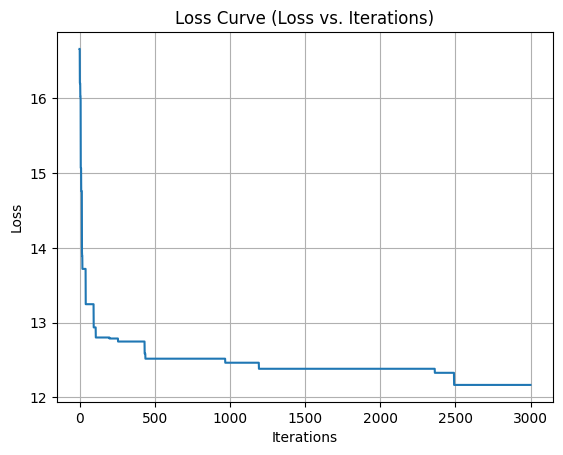

0.6279626170930518


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Example dataset (replace this with your actual data)
# Assuming train_x and train_y are defined
train_y_encoded = one_hot.fit_transform(train_y.values.reshape(-1, 1)).toarray()

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y_encoded, test_size=0.2, random_state=42)

# Use the best parameters found earlier


# Initialize the Neural Network model with RHC and best hyperparameters
nn_model = mlrose.NeuralNetwork(
    hidden_nodes=[150], activation='relu', algorithm='genetic_alg',
    max_iters=3000, learning_rate=0.1, restarts=5, pop_size=20,
    curve=True, random_state=42
)
#changed max_iter from 1000 to 3000.



# Train the model
nn_model.fit(X_train, y_train)

# Get predictions and calculate accuracy on the validation set
y_pred = nn_model.predict(X_val)

# Convert one-hot encoded predictions back to original labels
y_pred_labels = one_hot.inverse_transform(y_pred)
y_val_labels = one_hot.inverse_transform(y_val)

# Calculate accuracy
accuracy = accuracy_score(y_val_labels, y_pred_labels)
print(f"Validation Accuracy: {accuracy}")

# Step 4: Plot the loss curve
# The `fitness_curve` contains the loss values (not just fitness) at each iteration
plt.plot(nn_model.fitness_curve[:,0])
plt.title("Loss Curve (Loss vs. Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#max iters = 3k->
#Validation Accuracy: 0.6203288490284006
#ran 1h max iters 3k
y_pred = nn_model.predict(test_x)
y_pred  = [np.argmax(x)+1 for x in y_pred]
print(f1_score(y_test, y_pred, average='macro'))